In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]
import matplotlib as mpl
import cv2
import math
import imp #for debugging
import time

import scipy as scipy
from scipy.signal import hilbert
from scipy.signal import hilbert2
import scipy.stats as stats
import scipy.signal as signal
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import scipy.misc as misc
import scipy.special as sp
import scipy.ndimage as ndimage

import utils.distributions as dists
import utils.imread_utils as imr
import utils.radial_analysis as ran
import utils.pc_utils as pcu
import utils.plot_utils as plu

import phasepack as pp

#jupyter notebook settings
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi' : 300} #plotting pretty

Couldn't find pyfftw or multiprocessing package. Using default fft


## Take a look at Images

(-0.5, 619.5, 619.5, -0.5)

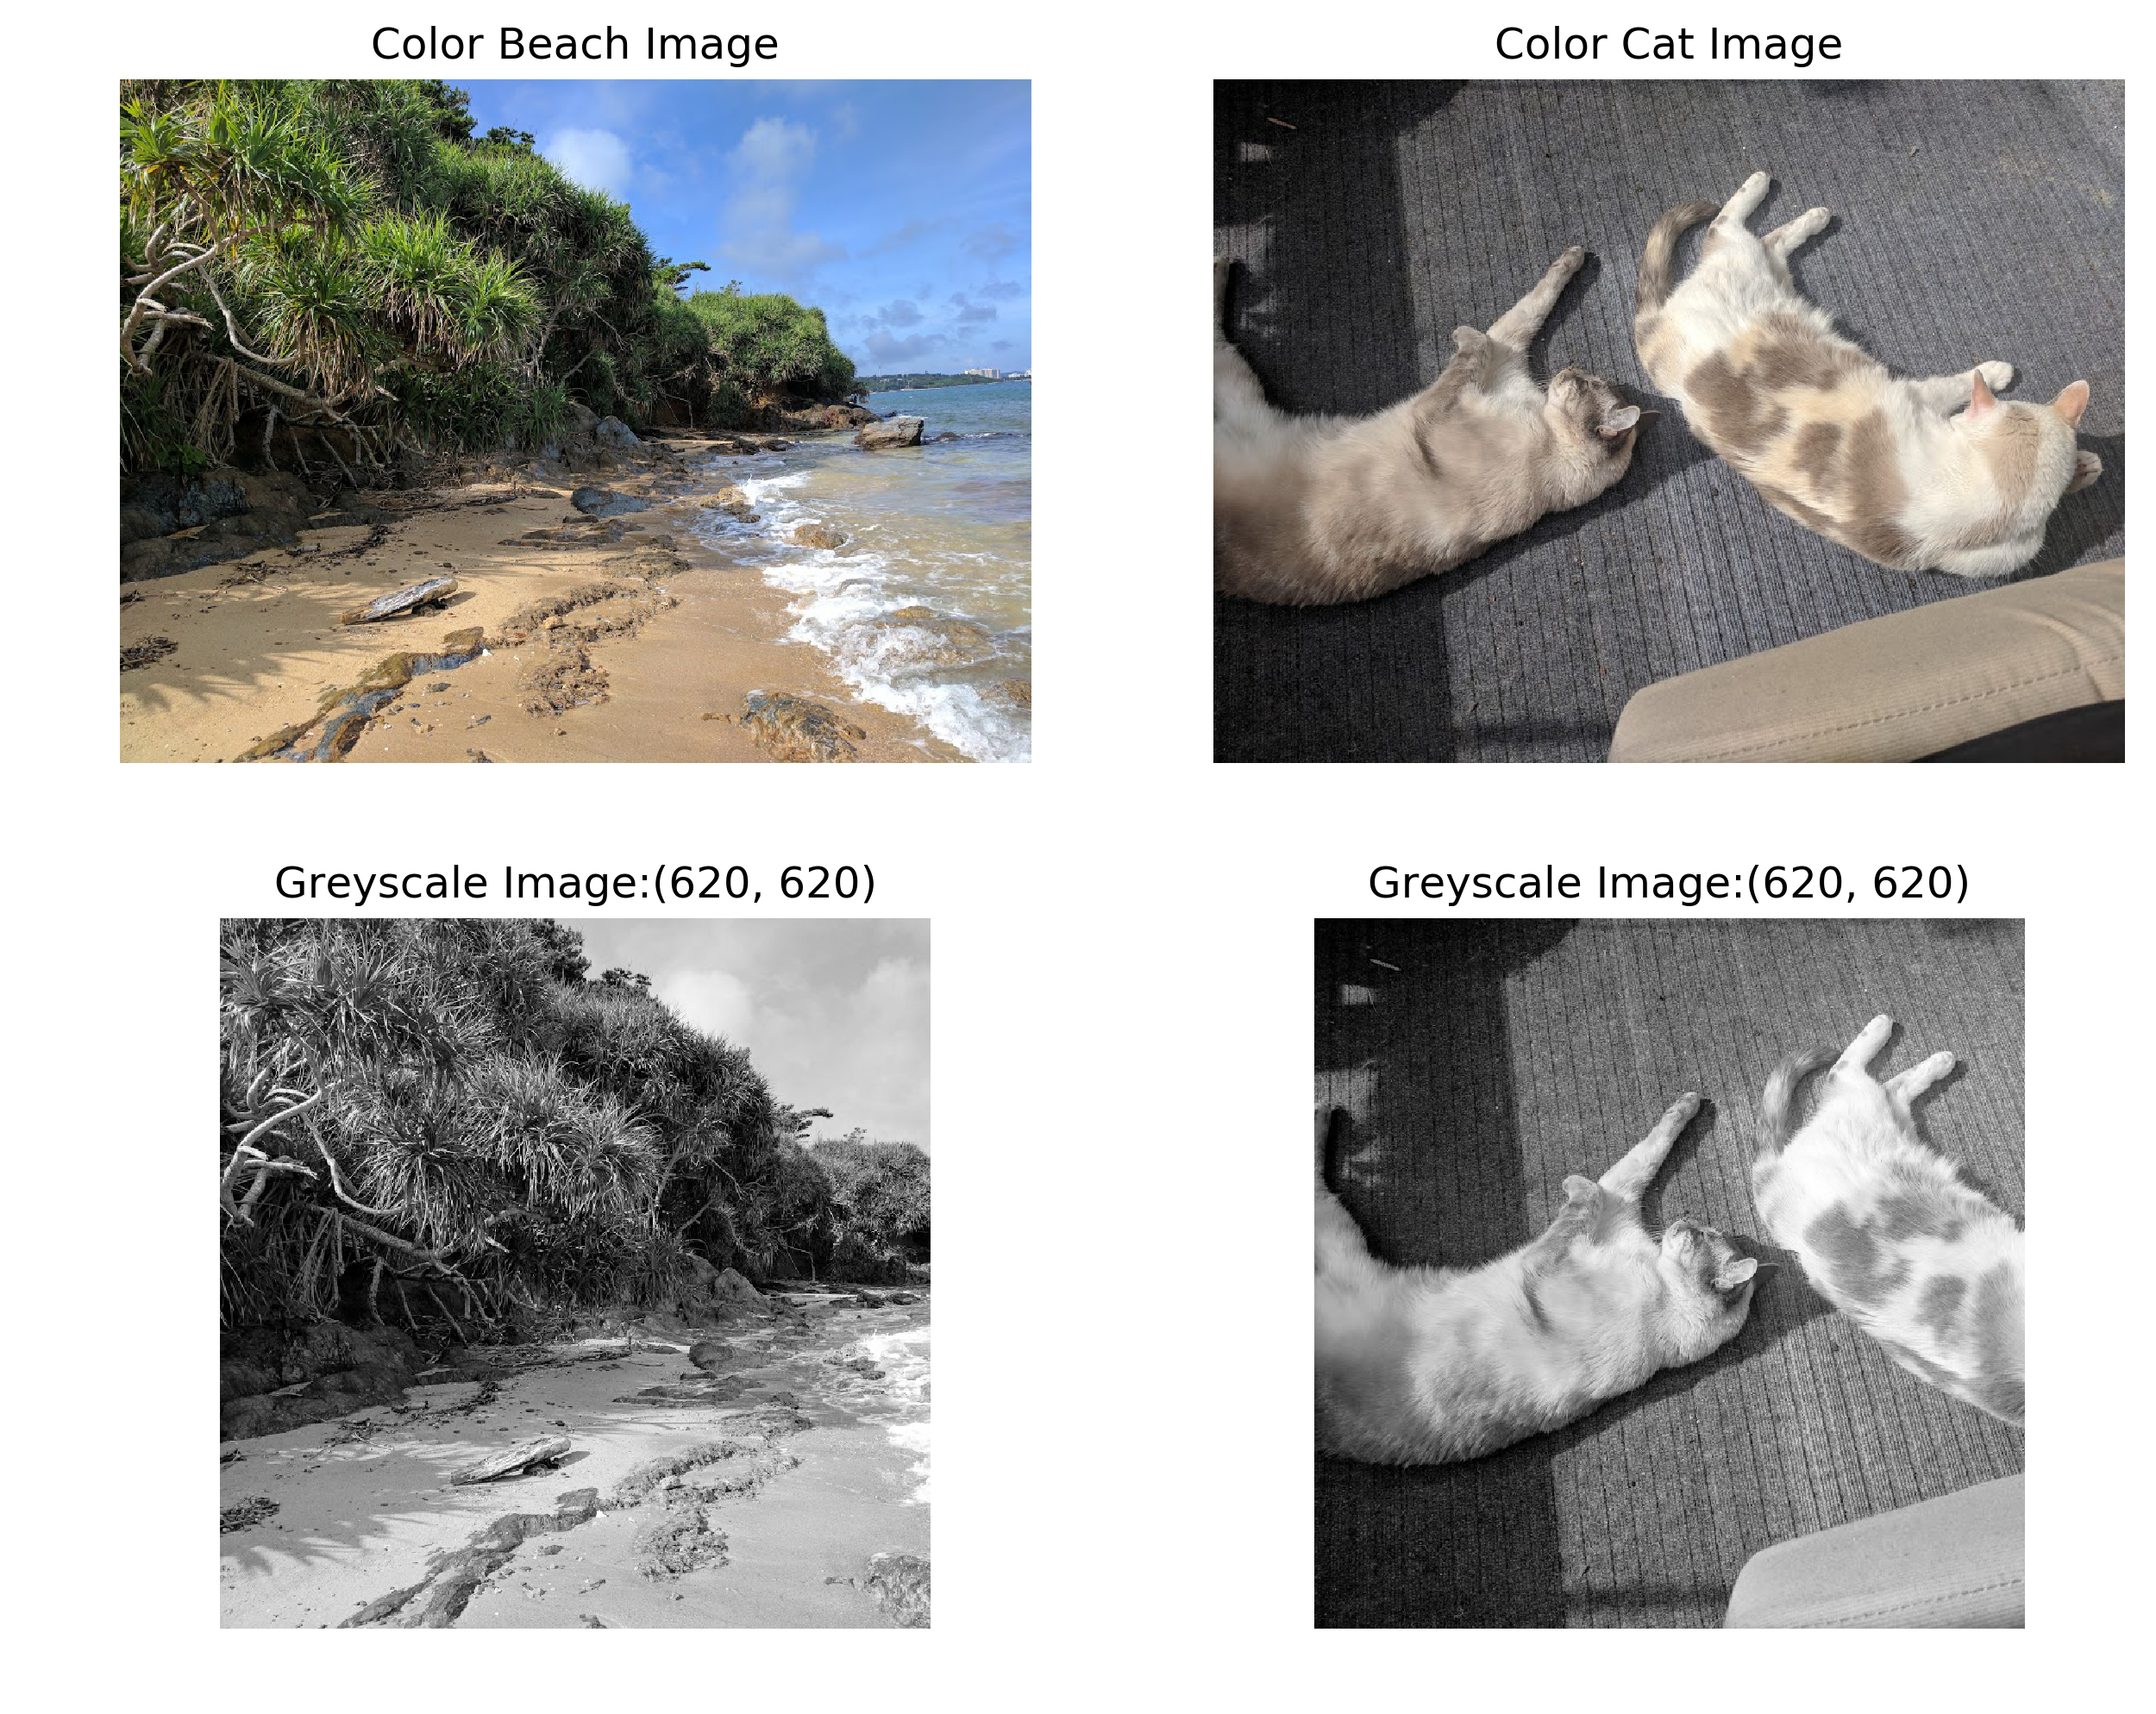

In [2]:
#Load an color image in and look at it
cbeach = cv2.imread('./images/testimages/beach.jpg')
cbeach = cv2.cvtColor(cbeach, cv2.COLOR_BGR2RGB)
beach = dists.crop_sq(np.mean(cbeach,axis=2))
beach = dists.rescale(beach)
beach = beach - np.mean(beach)

ccats = cv2.imread('./images/testimages/cats.jpg')
ccats = cv2.cvtColor(ccats, cv2.COLOR_BGR2RGB)
cats =  dists.crop_sq(np.mean(ccats,axis=2))
cats = dists.rescale(cats)
cats = cats - np.mean(cats)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(cbeach)
plt.title('Color Beach Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(beach,cmap="Greys_r")
plt.title('Greyscale Image:{}'.format(np.shape(beach)))
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(ccats)
plt.title('Color Cat Image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(cats,cmap="Greys_r")
plt.title('Greyscale Image:{}'.format(np.shape(cats)))
plt.axis('off')


(-0.5, 825.5, 619.5, -0.5)

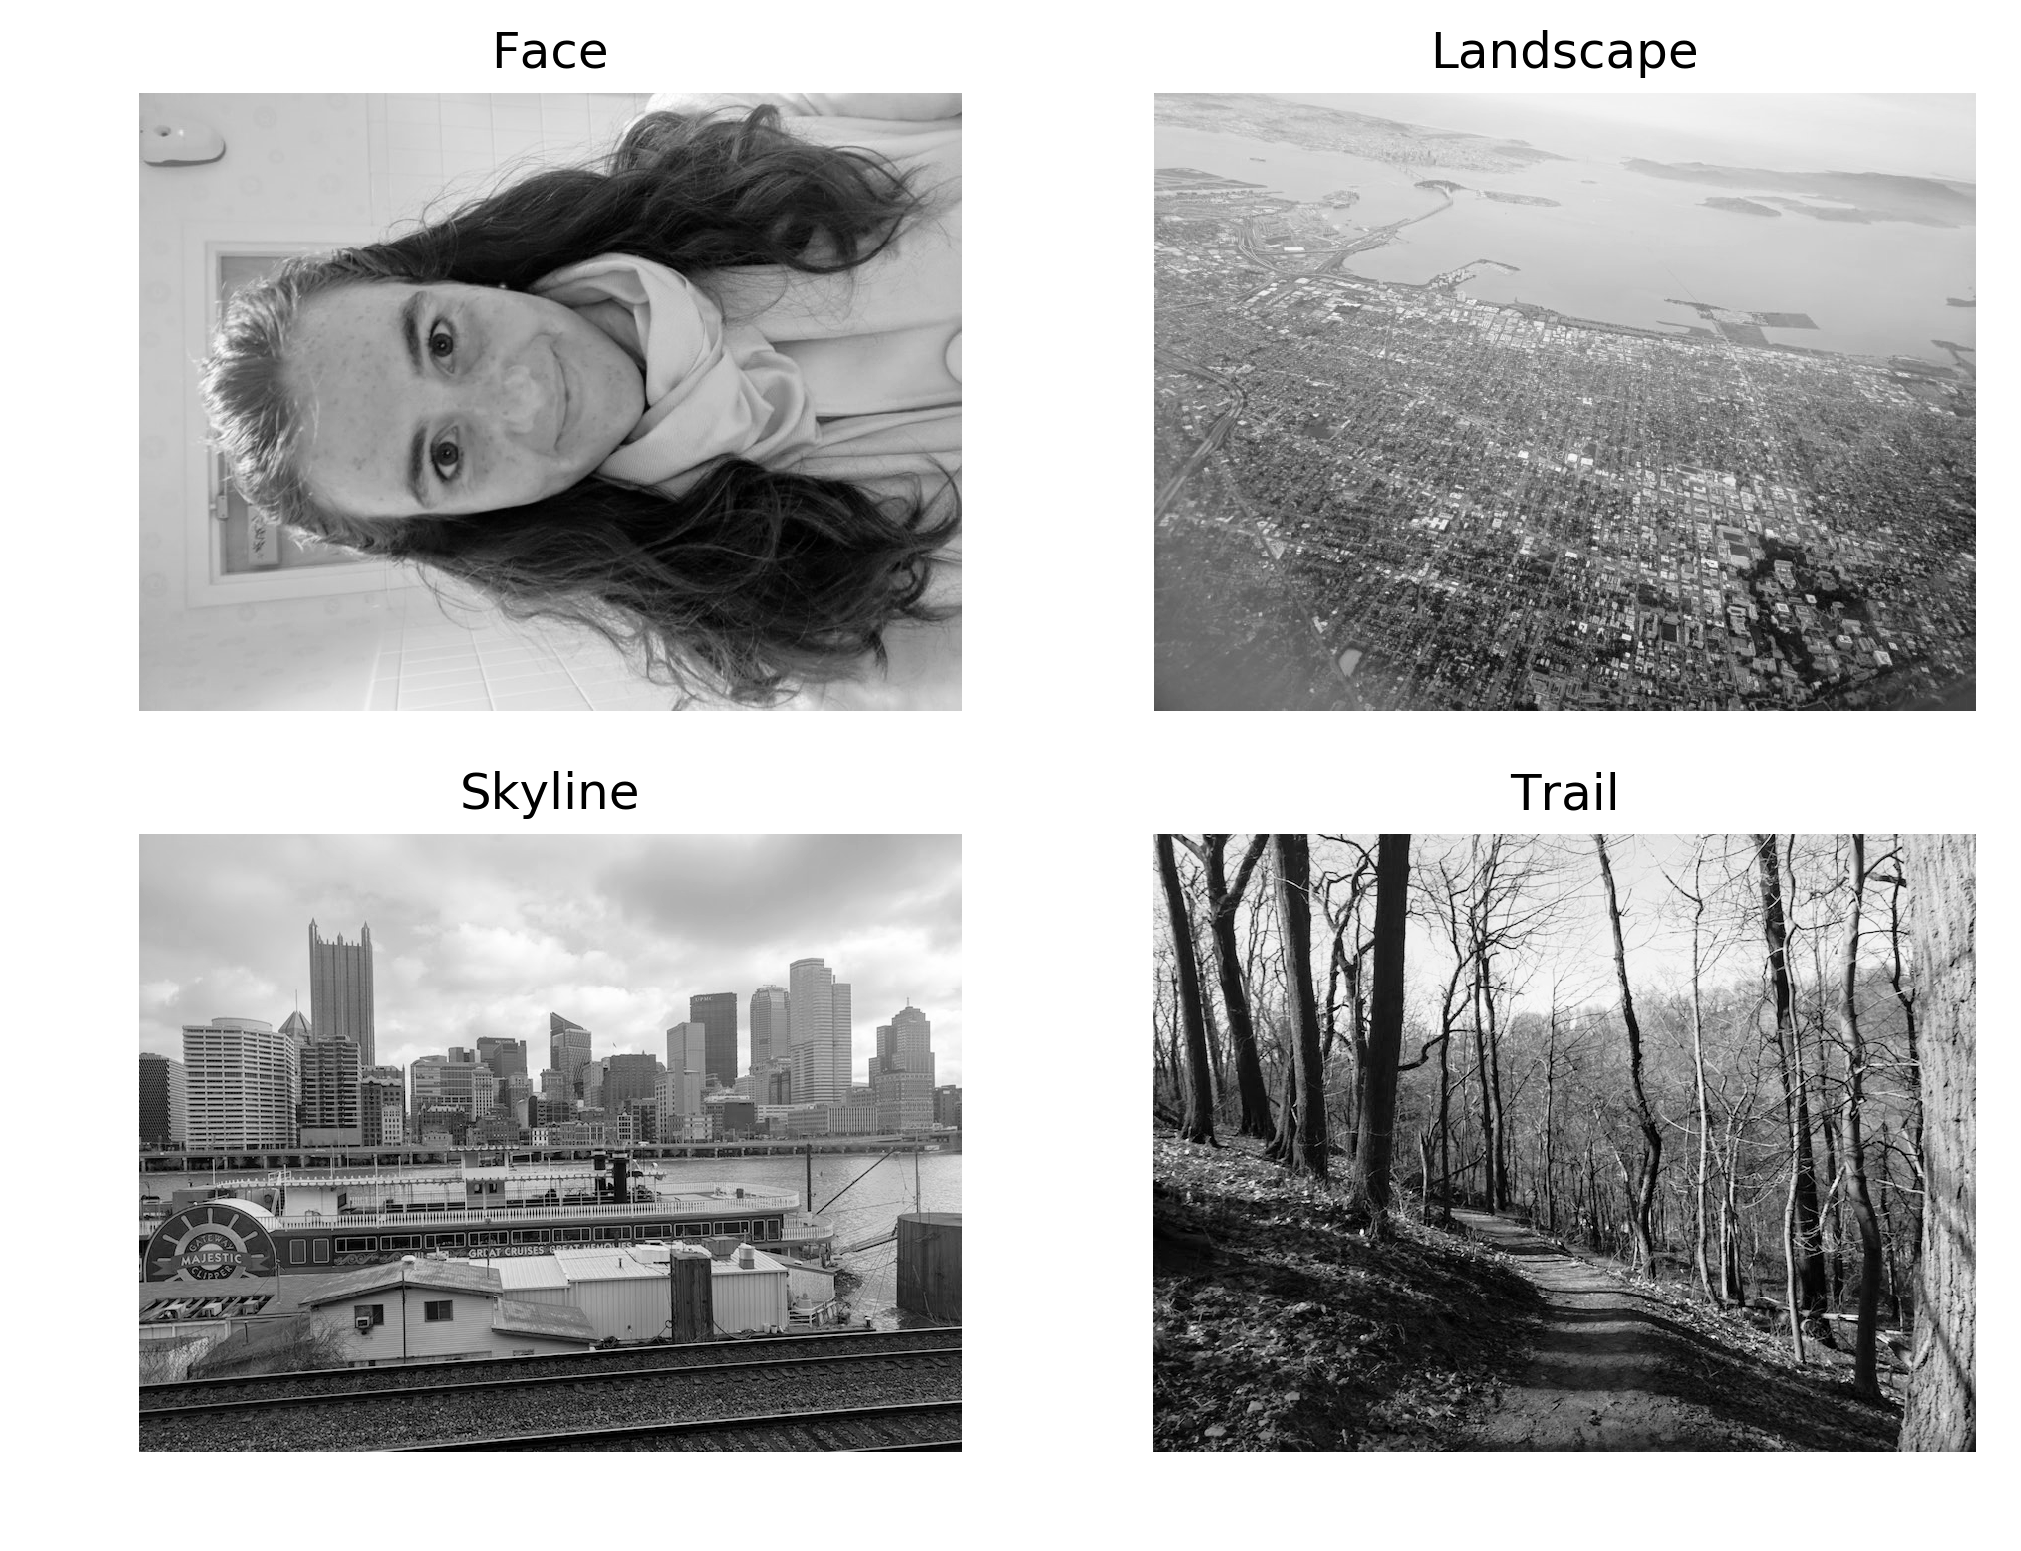

In [3]:
#face
face = np.mean(cv2.cvtColor(cv2.imread('./images/testimages/face.jpg'), cv2.COLOR_BGR2RGB),axis=-1)
face = face.T
face = dists.rescale(face)
#face = dists.crop_sq(face)
face = face - np.mean(face)
#landscape
land = np.mean(cv2.cvtColor(cv2.imread('./images/testimages/land.jpg'), cv2.COLOR_BGR2RGB),axis=-1)
land = dists.rescale(land)
land = land - np.mean(land)
#skyline
skyline = np.mean(cv2.cvtColor(cv2.imread('./images/testimages/skyline.jpg'), cv2.COLOR_BGR2RGB),axis=-1)
skyline = dists.rescale(skyline)
skyline = skyline - np.mean(skyline)
#trail
trail = np.mean(cv2.cvtColor(cv2.imread('./images/testimages/trail.jpg'), cv2.COLOR_BGR2RGB),axis=-1)
trail  = dists.rescale(trail)
trail = trail - np.mean(trail)

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.imshow(face,cmap='Greys_r')
plt.title('Face')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(land,cmap='Greys_r')
plt.title('Landscape')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(skyline,cmap='Greys_r')
plt.title('Skyline')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(trail,cmap='Greys_r')
plt.title('Trail')
plt.axis('off')

## Use simple gradient algorithm to get to the right mean val for pc

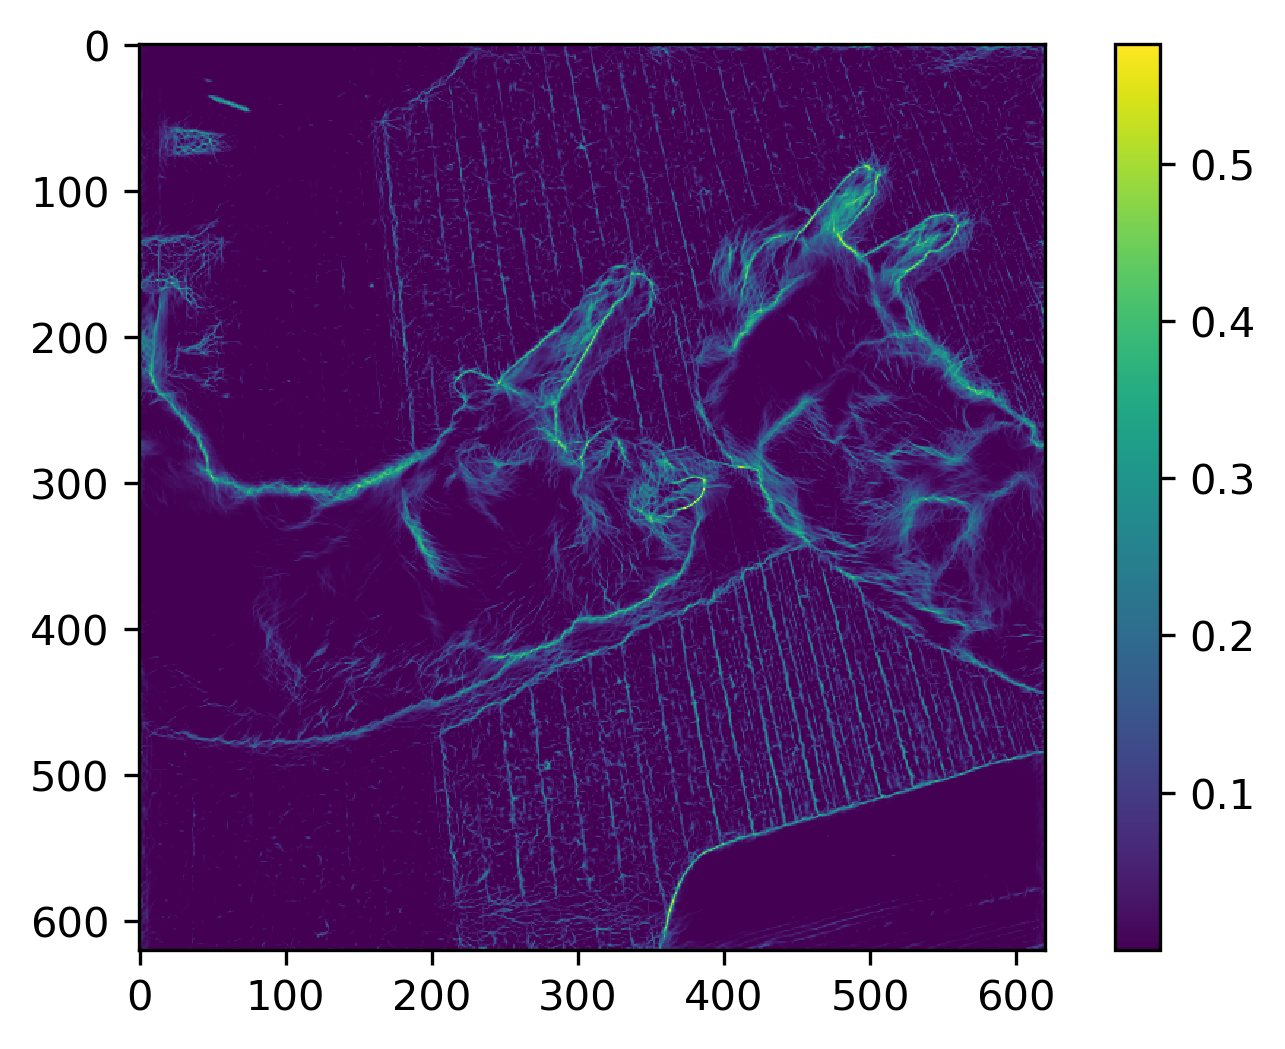

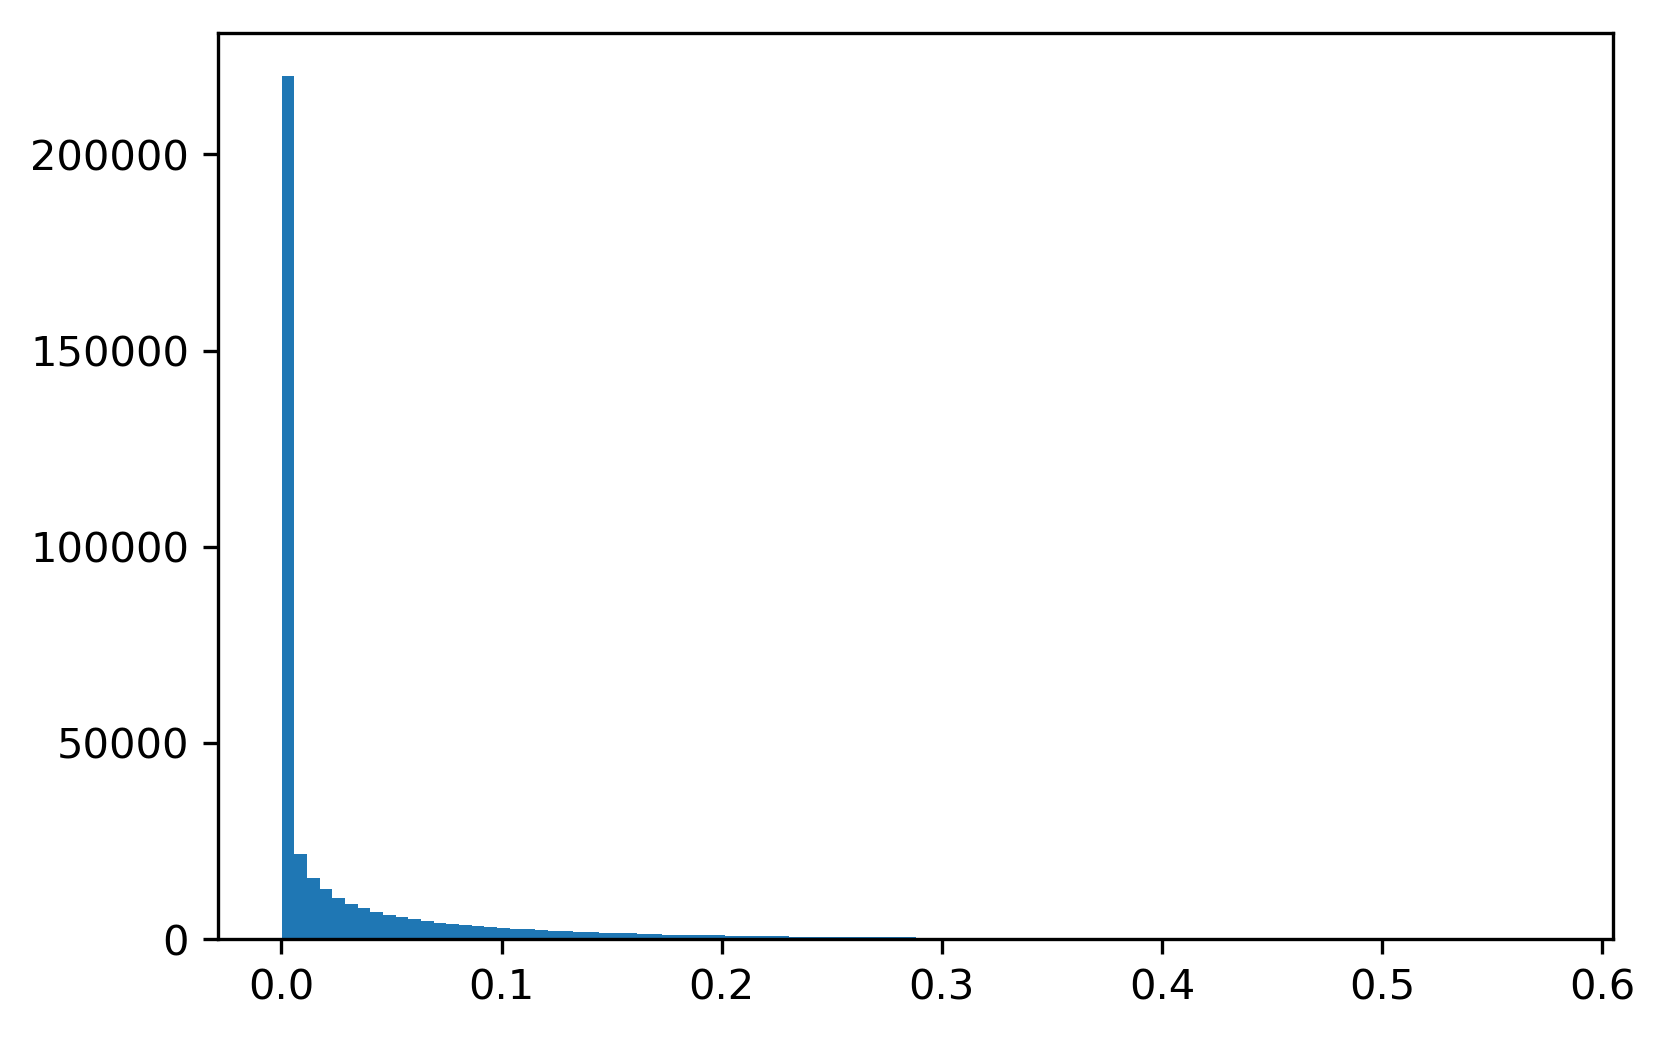

In [ ]:
pc = pp.phasecong(cats,cutOff=0)[0]
plt.imshow(pc)
plt.colorbar()
plt.show()
plt.hist(pc.flatten(),bins=100,log=False);

In [ ]:
imp.reload(pcu)
imp.reload(plu)
show = True
loss_measure = 'Median'
imsize = (16,16)
pc_goal = 0.1 #np.mean(pcu.measure_pc_2d(cats)[0]) 
mit = 1000000
ss = 0.005

for alpha in [1.5,1.2]:
#for alpha in [0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2]:
#for alpha in [1.2]:
    start_time = time.time()
    genim, ampl, gen_angle, seed_im, seed_angle, meanpc_evolution =  pcu.gen_pc(imsize, mean_pc_goal=pc_goal, thresh=0.001, 
                                                   max_iters=mit, step_size=ss, onef_alpha=alpha, onef_beta=1.6,
                                                wavelet=True, measure=loss_measure)
    print(f'finished in {time.time() - start_time}')
    #plot everything
    plu.compare_initim_genim(genim, seed_im, alpha, show=show)
    plu.compare_initim_genim_stats(genim, ampl, gen_angle, seed_im, seed_angle, alpha, show=show)
    plu.pc_evolution(meanpc_evolution, alpha, show=show, measure=loss_measure)
    plu.hist_pc_dists(genim, seed_im, cats, trail, beach, alpha, show=show)


Couldn't find pyfftw or multiprocessing package. Using default fft
**********10000**********20000**********30000**********40000**********50000**********60000**********70000**********80000**********90000**********100000**********110000**********120000**********130000**********140000***************160000**********170000**********180000**********190000**********200000**********210000**********310000**********410000**********420000**********430000**********440000*********630000**********640000**********650000**********660000**********670000**********680000**********690000**********700000**********710000**********720000**********730000**********740000**********750000**********760000**********770000**********780000**********790000**********800000**********810000**********820000**********830000**********840000**********850000**********860000**********870000*******

In [ ]:
plu.pc_evolution(meanpc_evolution, alpha)

In [ ]:
imp.reload(plu)
plu.hist_pc_dists(genim, seed_im, cats, trail, beach, alpha, show=show)
        

In [ ]:
onef = dists.make_onef_ims(cats.shape)
onef2amp = dists.make_onef_amp(cats.shape, 1.2, 1.6)
phi = np.random.rand(*cats.shape)*2*np.pi - np.pi
onef2 = np.real(np.fft.ifft2(np.fft.ifftshift(onef2amp*np.exp(1j*phi))))
onef2 = onef2 - np.mean(onef2)#i

plt.hist(pcu.measure_pc_2d(onef)[0].flatten(), bins=100, alpha = 0.5, label='onef', normed=True);
plt.hist(pcu.measure_pc_2d(onef2)[0].flatten(), bins=100, alpha = 0.5, label='onef2', normed=True);
plt.hist(pcu.measure_pc_2d(genim)[0].flatten(), bins=100, alpha = 0.5, label='genim', normed=True);
plt.hist(pcu.measure_pc_2d(seed_im)[0].flatten(), bins=100, alpha = 0.5, label='seedim', normed=True);
plt.hist(pcu.measure_pc_2d(dists.crop_matchsize(cats,genim))[0].flatten(), bins=100, alpha = 0.5, label='cats', normed=True);
plt.hist(pcu.measure_pc_2d(dists.crop_matchsize(beach,genim))[0].flatten(), bins=100, alpha = 0.5, label='beach',  normed=True);
plt.legend()

In [ ]:
onef1000 = dists.make_onef_ims((1000,1000))
onef500 = dists.make_onef_ims((500,500))
onef300 = dists.make_onef_ims((300,300))
onef100 = dists.make_onef_ims((100,100))
onef50 = dists.make_onef_ims((50,50))

plt.hist(pcu.measure_pc_2d(onef1000)[0].flatten(), bins=100, alpha = 0.5, label='1000', normed=True);
plt.hist(pcu.measure_pc_2d(onef500)[0].flatten(), bins=100, alpha = 0.5, label='500', normed=True);
plt.hist(pcu.measure_pc_2d(onef300)[0].flatten(), bins=100, alpha = 0.5, label='300', normed=True);
plt.hist(pcu.measure_pc_2d(onef100)[0].flatten(), bins=100, alpha = 0.5, label='100', normed=True);
plt.hist(pcu.measure_pc_2d(onef50)[0].flatten(), bins=100, alpha = 0.5, label='50', normed=True);
plt.legend()
plt.title('1/f Phase Congruency by Image Size')

plt.show()


plt.hist(pcu.measure_energy_2d(onef1000)[0].flatten(), bins=100, alpha = 0.5, label='1000', normed=True);
plt.hist(pcu.measure_energy_2d(onef500)[0].flatten(), bins=100, alpha = 0.5, label='500', normed=True);
plt.hist(pcu.measure_energy_2d(onef300)[0].flatten(), bins=100, alpha = 0.5, label='300', normed=True);
plt.hist(pcu.measure_energy_2d(onef100)[0].flatten(), bins=100, alpha = 0.5, label='100', normed=True);
plt.hist(pcu.measure_energy_2d(onef50)[0].flatten(), bins=100, alpha = 0.5, label='50', normed=True);
plt.legend()
plt.title('1/f Energy by Image Size')

plt.show()

In [ ]:
plt.hist(pcu.measure_pc_2d(cats[:500,:500])[0].flatten(), bins=100, alpha = 0.5, label='500', normed=True);
plt.hist(pcu.measure_pc_2d(cats[:300,:300])[0].flatten(), bins=100, alpha = 0.5, label='300', normed=True);
plt.hist(pcu.measure_pc_2d(cats[:100,:100])[0].flatten(), bins=100, alpha = 0.5, label='100', normed=True);
plt.hist(pcu.measure_pc_2d(cats[:50,:50])[0].flatten(), bins=100, alpha = 0.5, label='50a', normed=True);
plt.hist(pcu.measure_pc_2d(cats[100:150,100:150])[0].flatten(), bins=100, alpha = 0.5, label='50b', normed=True);
plt.hist(pcu.measure_pc_2d(cats[500:550,500:550])[0].flatten(), bins=100, alpha = 0.5, label='50c', normed=True);
plt.legend()
plt.title('Cats Phase Congruency by Image Size')

plt.show()

plt.hist(pcu.measure_energy_2d(cats[:500,:500])[0].flatten(), bins=100, alpha = 0.5, label='500', normed=True);
plt.hist(pcu.measure_energy_2d(cats[:300,:300])[0].flatten(), bins=100, alpha = 0.5, label='300', normed=True);
plt.hist(pcu.measure_energy_2d(cats[:100,:100])[0].flatten(), bins=100, alpha = 0.5, label='100', normed=True);
plt.hist(pcu.measure_energy_2d(cats[:50,:50])[0].flatten(), bins=100, alpha = 0.5, label='50a', normed=True);
plt.hist(pcu.measure_energy_2d(cats[100:150,100:150])[0].flatten(), bins=100, alpha = 0.5, label='50b', normed=True);
plt.hist(pcu.measure_energy_2d(cats[500:550,500:550])[0].flatten(), bins=100, alpha = 0.5, label='50b', normed=True);
plt.legend()
plt.title('Cats Energy by Image Size')


In [ ]:
plt.hist(pcu.measure_pc_2d(onef500)[0].flatten(), bins=100, alpha = 0.5, label='1/f 500', normed=True);
plt.hist(pcu.measure_pc_2d(cats[:500,:500])[0].flatten(), bins=100, alpha = 0.5, label='cats 500', normed=True);
plt.hist(pcu.measure_pc_2d(onef300)[0].flatten(), bins=100, alpha = 0.5, label='1/f 300', normed=True);
plt.hist(pcu.measure_pc_2d(cats[:300,:300])[0].flatten(), bins=100, alpha = 0.5, label='cats 300', normed=True);
plt.hist(pcu.measure_pc_2d(onef100)[0].flatten(), bins=100, alpha = 0.5, label='1/f 100', normed=True);
plt.hist(pcu.measure_pc_2d(cats[:100,:100])[0].flatten(), bins=100, alpha = 0.5, label='cats 100a', normed=True);
plt.hist(pcu.measure_pc_2d(cats[500:600,500:600])[0].flatten(), bins=100, alpha = 0.5, label='cats 100b', normed=True);

plt.legend()
plt.title('1/f Phase Congruency by Image Size')

plt.show()

In [ ]:
plt.hist(pcu.measure_energy_2d(onef500)[0].flatten(), bins=100, alpha = 0.5, label='1/f 500', normed=True);
plt.hist(pcu.measure_energy_2d(cats[:500,:500])[0].flatten(), bins=100, alpha = 0.5, label='cats 500', normed=True);
plt.hist(pcu.measure_energy_2d(onef300)[0].flatten(), bins=100, alpha = 0.5, label='1/f 300', normed=True);
plt.hist(pcu.measure_energy_2d(cats[:300,:300])[0].flatten(), bins=100, alpha = 0.5, label='cats 300', normed=True);
plt.hist(pcu.measure_energy_2d(onef100)[0].flatten(), bins=100, alpha = 0.5, label='1/f 100', normed=True);
plt.hist(pcu.measure_energy_2d(cats[:100,:100])[0].flatten(), bins=100, alpha = 0.5, label='cats 100', normed=True);

plt.legend()
plt.title('1/f Energy by Image Size')

plt.show()

In [ ]:
plt.hist(pcu.measure_pc_2d(genim)[0].flatten(), bins=100, alpha = 0.5, label='gen', normed=True);
plt.hist(pcu.measure_pc_2d(seed_im)[0].flatten(), bins=100, alpha = 0.5, label='init', normed=True);
plt.hist(pcu.measure_pc_2d(dists.crop_matchsize(cats,genim))[0].flatten(), bins=100, alpha = 0.5, label='cats', normed=True);
plt.hist(pcu.measure_pc_2d(dists.make_onef_ims(genim.shape, alpha=alpha))[0].flatten(), bins=100, alpha = 0.5, label='init_id', normed=True);

plt.legend()

In [ ]:
plt.hist(pcu.measure_energy_2d(genim)[0].flatten(), bins=50, alpha = 0.5, label='gen', normed=False);
plt.hist(pcu.measure_energy_2d(seed_im)[0].flatten(), bins=50, alpha = 0.5, label='init', normed=False);
plt.hist(pcu.measure_energy_2d(dists.crop_matchsize(cats,genim))[0].flatten(), bins=50, alpha = 0.5, label='cats', normed=False);
plt.hist(pcu.measure_energy_2d(dists.make_onef_ims(genim.shape, alpha=alpha))[0].flatten(), bins=50, alpha = 0.5, label='init_id', normed=False);

plt.legend()

In [ ]:
cat_ft = np.fft.fftshift(np.fft.fft2(cats))
angle_cats = np.angle(cat_ft)
amp_cats = np.abs(cat_ft)
beach_ft = np.fft.fftshift(np.fft.fft2(beach))
angle_beach = np.angle(beach_ft)
amp_beach = np.abs(beach_ft)

cat_angle_beach_amp = np.real(np.fft.ifft2(np.fft.fftshift(amp_beach* np.exp(1j*angle_cats))))                                   
beach_angle_cat_amp = np.real(np.fft.ifft2(np.fft.fftshift(amp_cats* np.exp(1j*angle_beach))))

plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(cats,cmap='Greys_r')
plt.axis('off')
plt.title('Cats')
plt.subplot(222)
plt.imshow(beach,cmap='Greys_r')
plt.axis('off')
plt.title('Beach')
plt.subplot(223)
plt.imshow(cat_angle_beach_amp,cmap='Greys_r')
plt.axis('off')
plt.title('Cats Angle, Beach Amp')
plt.subplot(224)
plt.imshow(beach_angle_cat_amp,cmap='Greys_r')
plt.axis('off')
plt.title('Beach Amgle, Cats Amp')


## Local Energy & Phase Congruency for a Simple Example - A Step Function

In [ ]:
import imp
imp.reload(pcu)
time = np.arange(0,1,1/100)
step_fun = np.append(np.append(np.zeros(33), np.ones(33)), -1*np.ones(34))

ft = np.fft.fft(step_fun)
fqs = np.fft.fftfreq(100,.01)
amp = np.abs(ft)
angle = np.angle(ft)

energy = pcu.get_local_energy_1d(step_fun)
pc = pcu.get_local_pc_1d(step_fun)

plt.figure(figsize=(3,6))

plt.subplot(3,1,1)
plt.plot(time,step_fun,'.')
plt.title('Step Function')

plt.subplot(3,1,2)
plt.plot(time, energy,'.')
plt.title('Energy')

plt.subplot(3,1,3)
plt.plot(time, pc,'.')
plt.title('Phase Congruency')

plt.tight_layout()


## Measure Phase Congruency in 2D

In [ ]:
energy_cats, epb_cats = pcu.measure_energy_2d(cats)
energy_beach, epb_beach = pcu.measure_energy_2d(beach)

pc_cats, pb_cats = pcu.measure_pc2_2d(cats)
pc_beach, pb_beach = pcu.measure_pc2_2d(beach)

In [ ]:
#compare three pc calculations
plt.figure(figsize=(6,3))
plt.subplot(2,2,1)
plt.imshow(pcu.measure_pc_2d(cats,pcn=1)[0],cmap='Greys_r')
plt.axis('off')
plt.title('Fourier PC')
# plt.subplot(2,3,2)
# plt.imshow(measure_pc_2d(cats,pcn=2)[0],cmap='Greys_r')
# plt.axis('off')
plt.subplot(2,2,2)
plt.title('Wavelet PC')
plt.imshow(pp.phasecong(cats)[0],cmap='Greys_r')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(pcu.measure_pc_2d(beach,pcn=1)[0],cmap='Greys_r')
plt.axis('off')
# plt.subplot(2,3,5)
# plt.imshow(measure_pc_2d(beach,pcn=2)[0],cmap='Greys_r')
# plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(pp.phasecong(beach)[0],cmap='Greys_r')
plt.axis('off')

In [ ]:
#redo calculations
ft_beach = np.fft.fftshift(np.fft.fft2(beach))
amp_beach = np.abs(ft_beach)
angle_beach = np.angle(ft_beach)
pc_beach, pb_beach = pcu.measure_pc_2d(beach)
#pc_beach = pp.phasecong(beach)

ft_cats = np.fft.fftshift(np.fft.fft2(cats))
amp_cats = np.abs(ft_cats)
angle_cats = np.angle(ft_cats)
pc_cats, pb_cats = pcu.measure_pc_2d(cats)
#pc_cats = pp.phasecong(cats)

ft_face = np.fft.fftshift(np.fft.fft2(face))
amp_face = np.abs(ft_face)
angle_face = np.angle(ft_face)
pc_face, pb_face = pcu.measure_pc_2d(face)

ft_land = np.fft.fftshift(np.fft.fft2(land))
amp_land = np.abs(ft_land)
angle_land = np.angle(ft_land)
pc_land, pb_land = pcu.measure_pc_2d(land)

ft_skyline = np.fft.fftshift(np.fft.fft2(skyline))
amp_skyline = np.abs(ft_skyline)
angle_skyline = np.angle(ft_skyline)
pc_skyline, pb_skyline = pcu.measure_pc_2d(skyline)

ft_trail = np.fft.fftshift(np.fft.fft2(trail))
amp_trail = np.abs(ft_trail )
angle_trail = np.angle(ft_trail)
pc_trail, pb_trail = pcu.measure_pc_2d(trail)

recon_beach = np.fft.ifft2(np.fft.ifftshift(amp_beach* np.exp(1j*angle_beach)))
recon_cats = np.fft.ifft2(np.fft.ifftshift(amp_cats* np.exp(1j*angle_cats)))
recon_anglebeach_ampcats = np.fft.ifft2(np.fft.ifftshift(amp_cats* np.exp(1j*angle_beach)))
recon_anglcats_ampbeach = np.fft.ifft2(np.fft.ifftshift(amp_beach* np.exp(1j*angle_cats)))

In [ ]:
def set_thresh(m,tmin=0.4):
    m = dists.rescale(m)
    supra_threshold_indices = m < tmin
    mthresh = np.ones_like(m)
    mthresh[supra_threshold_indices] = 0
    return(mthresh)

In [ ]:
#test on grid
grid = np.vstack([np.zeros((np.divide(np.shape(cats),2)).astype(int)),np.ones(np.divide(np.shape(cats),2).astype(int))])
grid = np.hstack([grid,np.flip(grid,0)])
grid = dists.rescale(grid)
grid = grid - np.mean(grid)
pc_grid = pp.phasecong(grid)[0]
pc_grid, pb_grid = pcu.measure_pc_2d(grid)
pc_grid_thresh = set_thresh(pc_grid,tmin = 0.2)


plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.imshow(grid,cmap='Greys')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(pc_grid,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pc_grid_thresh,cmap='Greys')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(pb_grid,cmap='hsv')
plt.axis('off')
plt.colorbar()

In [ ]:
#test on blockworld
cblocks = cv2.imread('./images/testimages/blockworld.png')
cblocks = cv2.cvtColor(cblocks, cv2.COLOR_BGR2RGB)
#print(blocks.shape)
blocks = np.mean(cblocks,axis=2)
blocks = dists.rescale(blocks)
blocks= blocks - np.mean(blocks)
pc_blocks, pb_blocks = pcu.measure_pc_2d(blocks)
#pc_blocks = pp.phasecong(blocks)[0]


hsv = mpl.cm.get_cmap('hsv')
# since pb_leaves goes from -np.pi to np.pi, we can normailize it like so
pb_blocks_cmap = hsv(pb_blocks/np.pi/2+0.5)
pb_blocks_cmap[...,-1] = pc_blocks / np.max(pc_blocks)


pc_blocks_thresh = set_thresh(pc_blocks,tmin = 0.3)


plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.imshow(blocks,cmap='Greys')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(pc_blocks,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pb_blocks,cmap='hsv')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(pb_blocks_cmap)
plt.axis('off')

In [ ]:
#test on shapes
cshapes = cv2.imread('./images/testimages/shapes.png')
cshapes = cv2.cvtColor(cshapes, cv2.COLOR_BGR2RGB)
#print(blocks.shape)
shapes = np.mean(cshapes,axis=2)
shapes = dists.rescale(shapes)
shapes = shapes - np.mean(shapes)
pc_shapes, pb_shapes = pcu.measure_pc_2d(shapes)
#pc_shapes = pp.phasecong(shapes)[0]


hsv = mpl.cm.get_cmap('hsv')
# since pb_leaves goes from -np.pi to np.pi, we can normailize it like so
pb_shapes_cmap = hsv(pb_shapes/np.pi/2+0.5)
pb_shapes_cmap[...,-1] = pc_shapes / np.max(pc_shapes)


pc_shapes_thresh = set_thresh(pc_shapes,tmin = 0.3)

plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.imshow(shapes,cmap='Greys')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(pc_shapes,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pb_shapes,cmap='hsv')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(pb_shapes_cmap)
plt.axis('off')

In [ ]:
#test on dead leaves
cleaves = cv2.imread('./images/testimages/deadleaves.png')
cleaves = cv2.cvtColor(cleaves, cv2.COLOR_BGR2RGB)
#print(blocks.shape)
leaves = np.mean(cleaves,axis=2)
leaves = dists.rescale(leaves)
leaves = leaves - np.mean(leaves)
pc_leaves, pb_leaves = pcu.measure_pc_2d(leaves)
#pc_leaves = pp.phasecong(leaves)[0]

hsv = mpl.cm.get_cmap('hsv')
# since pb_leaves goes from -np.pi to np.pi, we can normailize it like so
pb_leaves_cmap = hsv(pb_leaves/np.pi/2+0.5)
pb_leaves_cmap[...,-1] = pc_leaves / np.max(pc_leaves)


pc_leaves_thresh = set_thresh(pc_leaves,tmin = 0.2)




plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.imshow(leaves,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(pc_leaves,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

# plt.subplot(2,2,3)
# plt.imshow(pc_leaves_thresh,cmap='Greys')
# plt.axis('off')
# plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pb_leaves,cmap='hsv')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(pb_leaves_cmap)
plt.axis('off')

In [ ]:
#test on childface from kovesi's thesis
cchild = cv2.imread('./images/testimages/child.png')
cchild = cv2.cvtColor(cchild, cv2.COLOR_BGR2RGB)
child = np.mean(cchild,axis=2)
child = dists.rescale(child)
child = child - np.mean(child)
pc_child, pb_child = pcu.measure_pc_2d(child)
#pc_child = pp.phasecong(child)[0]

# since pb_leaves goes from -np.pi to np.pi, we can normailize it like so
pb_child_cmap = hsv(pb_child/np.pi/2+0.5)
pb_child_cmap[...,-1] = pc_child / np.max(pc_child)


pc_child_thresh = set_thresh(pc_child,tmin = 0.3)


plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.imshow(child,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(pc_child,cmap='Greys_r')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pb_child,cmap='hsv')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(pb_child_cmap)
plt.axis('off')


In [ ]:
energy_cats, epb_cats = pcu.measure_energy_2d(cats)
energy_beach, epb_beach = pcu.measure_energy_2d(beach)
pc_cats, pb_cats = pcu.measure_pc_2d(cats)
pc_beach, pb_beach = pcu.measure_pc_2d(beach)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(energy_beach, cmap="Greys_r")
plt.title('Energy Beach')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(energy_cats, cmap="Greys_r")
plt.title('Energy Cats')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pc_beach, cmap="Greys_r")
plt.title('PC Beach')
plt.axis('off')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(pc_cats, cmap="Greys_r")
plt.title('PC Cats')
plt.axis('off')
plt.colorbar()

$$\LARGE{\bar{\phi}}$$

In [ ]:
pb_cats_cmap = hsv(pb_cats/np.pi/2+0.5)
pb_cats_cmap[...,-1] = np.exp(pc_cats / np.max(pc_cats))

pb_beach_cmap = hsv(pb_beach/np.pi/2+0.5)
pb_beach_cmap[...,-1] = np.exp(pc_beach / np.max(pc_beach))

plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.imshow(pb_cats,cmap='hsv')
plt.axis('off')
plt.title('Phibar Cats')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(pb_beach,cmap='hsv')
plt.axis('off')
plt.title('Phibar Beach')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(pb_cats_cmap)
plt.title('Weighted Phibar Cats')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(pb_beach_cmap)
plt.title('Weighted Phibar Beach')
plt.axis('off')

In [ ]:
plt.hist(pc_leaves.flatten(),bins=100,label='leaves',normed=True,alpha=0.3);
plt.hist(pc_cats.flatten(),bins=100,label='cats',normed=True,alpha=0.3);
plt.hist(pc_trail.flatten(),bins=100,label='trail',normed=True,alpha=0.3);
plt.hist(pc_face.flatten(),bins=100,label='face',normed=True,alpha=0.3);
plt.hist(pc_shapes.flatten(),bins=100,label='shapes',normed=True,alpha=0.3);
plt.title('PC Distributions')
plt.legend()

In [ ]:
alp = 0.2

plt.subplot(211)
plt.hist(pb_beach.flatten(),bins=100,label='beach',normed=True,alpha=alp);
plt.hist(pb_cats.flatten(),bins=100,label='cats',normed=True,alpha=alp);
plt.hist(pb_face.flatten(),bins=100,label='onef',normed=True,alpha=alp);
plt.legend()
plt.title('Phibar Distributions')

plt.subplot(212)
plt.hist(pb_leaves.flatten(),bins=100,label='leaves',normed=True,alpha=alp, color='C4');
plt.hist(pb_trail.flatten(),bins=100,label='trail',normed=True,alpha=alp, color='C3');
plt.hist(pb_shapes.flatten(),bins=100,label='shapes',normed=True,alpha=alp, color='C5');
plt.legend()
plt.title('Phibar Distributions')

plt.tight_layout()

cool! These are definitely NOT uniform. They look oddly symmetric too, which is interesting. Perhaps this is symmetry in objects?

## What does Noise look like in terms of local energy spectrum?

In [ ]:
#cats phase, 1/f amplitude
#recon_onef_cats
#redo phase and angle without cosine window
ft_cwcats = np.fft.fft2(cats)

f_alpha = 1.0
f_k = 100000

def make_onef(shape, alpha, beta):
    y, x = np.indices(shape)
    center = np.array(shape)/2
    r = np.hypot(x - center[1], y - center[0])
    amp = np.divide((1+r**alpha),beta)
    return amp

cats_pd_1dft = ran.azimuthalAverage(np.abs(amp_cats))
frqs = np.arange(len(cats_pd_1dft))+1 #one through len of array
cats_alpha, cats_lgbeta = np.polyfit(np.log(np.divide(1.0,frqs)), np.log(cats_pd_1dft), deg=1)

amp_onef = make_onef(np.shape(cats),cats_alpha, np.exp(cats_lgbeta))
rand_noise = np.random.rand(np.shape(angle_cats)[0],np.shape(angle_cats)[1])
rand_noise_1 = np.random.rand(np.shape(angle_cats)[0],np.shape(angle_cats)[1])*2*np.pi - np.pi

#1/f amplitude, unifrom phase
recon_onef_unif =  np.real(np.fft.ifft2(np.fft.ifftshift(amp_onef*np.exp(1j*rand_noise_1))))

#random phase, random amplitude
random_noise = np.random.rand(np.shape(cats)[0],np.shape(cats)[1])
#cat phase 1/f amplitude
recon_onef_cats = np.real(np.fft.ifft2(np.fft.ifftshift(amp_onef*np.exp(1j*angle_cats))))
#random phase, cat amplitude
recon_rand_phase_cats_1 = np.real(np.fft.ifft2(np.fft.ifftshift(amp_cats*np.exp(1j*rand_noise_1))))
#cat phase, random amplitude
recon_rand_cats = np.real(np.fft.ifft2(np.fft.ifftshift(rand_noise*np.exp(1j*angle_cats))))
#cat recon
recon_cats = np.real(np.fft.ifft2(np.fft.fft2(cats)))
#cat original
#cats

plt.figure(figsize=(8,8))

plt.subplot(3,2,1)
plt.imshow(random_noise, cmap = 'Greys_r')
plt.title('Noise Energy')
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(recon_onef_cats, cmap = 'Greys_r')
plt.title('1/f Amplitude, Cat Phase Energy')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(recon_rand_phase_cats_1, cmap = 'Greys_r')
plt.title('Random Phase Cat Amplitude Energy')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(recon_rand_cats, cmap = 'Greys_r')
plt.title('Random Amplitude Cat Phase Energy')
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(np.real(recon_cats), cmap = 'Greys_r')
plt.title('Cats Energy Real Recon')
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow(cats, cmap = 'Greys_r')
plt.title('Cats Energy Raw')
plt.axis('off')

plt.tight_layout()

## Reconstruct from phibar and E

$$\LARGE{
E(x) = \sqrt{F^{2}(x) + H^{2}(x)}
}$$


$$\LARGE{
\bar{\phi}(x) = \arctan \lgroup{\frac{H(x)}{F(x)}}\rgroup
}$$


$$\LARGE{
\tilde{F}(x) = E(x)\cos{\bar{\phi}(x)}
}$$


In [ ]:
def pc_recon_im(phibar, e):
    im = np.multiply(np.cos(phibar),e)
    return(im)

energy_cats, epb_cats = pcu.measure_energy_2d(cats)
pc_cats, pb_cats = pcu.measure_pc_2d(cats)
energy_beach, epb_beach = pcu.measure_energy_2d(beach)
pc_beach, pb_beach = pcu.measure_pc_2d(beach)

cats_pc_recon = pcu.pc_recon_im(epb_cats, energy_cats)
beach_pc_recon = pcu.pc_recon_im(epb_beach, energy_beach)

#calc MSE
cats_pc_recon_mse = ((cats_pc_recon - cats) ** 2).mean()
beach_pc_recon_mse = ((beach_pc_recon - beach) ** 2).mean()
print(cats_pc_recon_mse, beach_pc_recon_mse)

plt.subplot(2,2,1)
plt.imshow(cats,cmap='Greys_r')
plt.title('original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(beach,cmap='Greys_r')
plt.title('original')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(cats_pc_recon,cmap='Greys_r')
plt.title('recon')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(beach_pc_recon,cmap='Greys_r')
plt.title('recon')
plt.axis('off')


this worked REALLY well. We should be able to sample now.

In [ ]:
pb_unif = np.random.uniform(-np.pi, np.pi, np.shape(pb_cats))
pc_rayl = np.random.rayleigh(1, np.shape(pc_cats))
pc_unif = np.random.uniform(0,1,np.shape(pc_cats))

rayl_pc_rand_pb_recon = pcu.pc_recon_im(pb_unif, pc_rayl)

cats_pc_rand_pb_recon = pcu.pc_recon_im(pb_unif, energy_cats)
beach_pc_rand_pb_recon = pcu.pc_recon_im(pb_unif, energy_beach)

unif_pc_cats_pb_recon = pcu.pc_recon_im(pb_cats, pc_unif)
unif_pc_beach_pb_recon = pcu.pc_recon_im(pb_beach, pc_unif)

rayl_pc_cats_pb_recon = pcu.pc_recon_im(pb_cats, pc_rayl)
rayl_pc_beach_pb_recon = pcu.pc_recon_im(pb_beach, pc_rayl)

cats_pc_beach_pb = pcu.pc_recon_im(pb_beach, pc_cats)
beach_pc_cats_pb = pcu.pc_recon_im(pb_cats, pc_beach)


plt.figure(figsize=(8,7))

plt.subplot(3,3,1)
plt.imshow(rayl_pc_rand_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC Rayl, PB rand')

plt.subplot(3,3,2)
plt.imshow(cats_pc_rand_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC cats, PB rand')

plt.subplot(3,3,3)
plt.imshow(beach_pc_rand_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC beach, PB rand')

plt.subplot(3,3,4)
plt.imshow(unif_pc_cats_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC Unif, PB cats')

plt.subplot(3,3,5)
plt.imshow(unif_pc_beach_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC Unif, PB beach')

plt.subplot(3,3,6)
plt.imshow(rayl_pc_cats_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC Rayl, PB cats')

plt.subplot(3,3,7)
plt.imshow(rayl_pc_beach_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('PC Rayl, PB beach')

plt.subplot(3,3,8)
plt.imshow(cats_pc_beach_pb,cmap='Greys_r')
plt.axis('off')
plt.title('PC Rcats, PB beach')

plt.subplot(3,3,9)
plt.imshow(beach_pc_cats_pb,cmap='Greys_r')
plt.axis('off')
plt.title('PC beach, PB cats')

In [ ]:
def imageHist4e(f):
    # imageHist4e(f) function to calculate the histogram of an image
    # input: image f
    # output: bin_vals (x axis) and bin_counts (the height of each bar)
    nbins = 255
    vmin = np.min(f)
    vmax = np.max(f)
    f_flat = f.flatten()
    bin_vals = np.linspace(vmin,vmax,nbins)
    bin_counts = np.zeros(nbins)
    for i in range(nbins-1):
        binlocs = np.where(f_flat<bin_vals[i+1])
        thisbin = f_flat[binlocs]
        bin_counts[i] = len(thisbin)
        f_flat = np.delete(f_flat,binlocs,None)
    return(bin_vals,bin_counts)

def histEqual4e(f):
    ## input: image f
    ## output: image g (histogram equalized)
    #normalize to 0-255
    vmin = np.min(f)
    vmax = np.max(f)
    f = np.divide((f-vmin),(vmax-vmin)) * 255
    f = f.astype(int)
    nbins = np.max(f)
    flatf = f.flatten()
    #f = intScaling4e(f,mode='full',dtype='integer')
    bins, counts = imageHist4e(f)
    # get normalized cdf
    cdf = counts.cumsum() # cumulative distribution function cdf = nbins * cdf / cdf[-1] # normalize
        #make our lookup table
    g = np.zeros(np.shape(flatf))
    for px in range(np.shape(flatf)[0]):
        cdfloc = flatf[px]
        g[px] = cdf[cdfloc-1]
    g = g.reshape(np.shape(f))
    return(g)

bpcbheq = histEqual4e(beach_pc_cats_pb)
cpcbheq = histEqual4e(cats_pc_beach_pb)

plt.subplot(221)
plt.imshow(beach_pc_cats_pb, cmap='Greys_r')
plt.axis('off')
plt.subplot(222)
plt.imshow(cats_pc_beach_pb, cmap='Greys_r')
plt.axis('off')
plt.subplot(223)
plt.imshow(bpcbheq, cmap='Greys_r')
plt.axis('off')
plt.subplot(224)
plt.imshow(cpcbheq, cmap='Greys_r')
plt.axis('off')

Hmmm, it looks again like the important salient information is in in the phibar (phase) information! Will sampling work then? 

In [ ]:
f_alpha = 1.8
f_k = 100000

def make_onef(shape, alpha, beta):
    y, x = np.indices(shape)
    center = np.array(shape)/2
    r = np.hypot(x - center[1], y - center[0])
    amp = np.divide(beta,(1+r**alpha))
    return amp

pc_onef = make_onef(np.shape(cats),f_alpha, f_k)
pb_unif = np.random.rand(*np.shape(cats))*2*np.pi - np.pi


plt.figure(figsize=(8,8))

#uniform random phibar, rayleigh rand PC
pb_unif = np.random.uniform(-np.pi, np.pi, np.shape(pb_cats))
pc_rayl = np.random.rayleigh(1, np.shape(pc_cats))
#pc_unif = np.random.uniform(0,1,np.shape(pc_cats))
rayl_pc_rand_pb_recon = pc_recon_im(pb_unif, pc_rayl)

plt.subplot(4,3,1)
plt.imshow(pc_rayl,cmap='Greys_r')
plt.axis('off')
plt.title('PC Map')
plt.subplot(4,3,2) 
plt.imshow(pb_unif,cmap='hsv')
plt.axis('off')
plt.title('Phibar Map')
plt.subplot(4,3,3)
plt.imshow(rayl_pc_rand_pb_recon,cmap='Greys_r')
plt.axis('off')
plt.title('Generated Image')

#uniform rand phibar, one/f rand PC
onef_noise =  np.real(np.fft.ifft2(np.fft.ifftshift(pc_onef*np.exp(1j*pb_unif))))
sample_onef_phibar_im = pc_recon_im(pb_unif, onef_noise) #uniform random phibar

plt.subplot(4,3,4)
plt.imshow(onef_noise,cmap='Greys_r')
plt.axis('off')
plt.title('PC Map')
plt.subplot(4,3,5) 
plt.imshow(pb_unif,cmap='hsv')
plt.axis('off')
plt.title('Phibar Map')
plt.subplot(4,3,6)
plt.imshow(sample_onef_phibar_im,cmap='Greys_r')
plt.axis('off')
plt.title('Generated Image')

#1/f phibar, uniform rand PC
sample_unif_phibar_im = pc_recon_im(onef_noise, pb_unif)

plt.subplot(4,3,7)
plt.imshow(pb_unif,cmap='Greys_r')
plt.axis('off')
plt.title('PC Map')
plt.subplot(4,3,8) 
plt.imshow(onef_noise,cmap='hsv')
plt.axis('off')
plt.title('Phibar Map')
plt.subplot(4,3,9)
plt.imshow(sample_unif_phibar_im,cmap='Greys_r')
plt.axis('off')
plt.title('Generated Image')

#1/f phibar, 1/f PC
sample_onef_im = pc_recon_im(onef_noise, onef_noise) #phibar same as pc

plt.subplot(4,3,10)
plt.imshow(onef_noise,cmap='Greys_r')
plt.axis('off')
plt.title('PC Map')
plt.subplot(4,3,11) 
plt.imshow(onef_noise,cmap='hsv')
plt.axis('off')
plt.title('Phibar Map')
plt.subplot(4,3,12)
plt.imshow(sample_onef_im,cmap='Greys_r')
plt.axis('off')
plt.title('Generated Image')

In [ ]:
myim = genim
myft = np.fft.fftshift(np.fft.fft2(myim))
myamp = np.abs(myft)
myphi = np.angle(myft)
myrecon = pcu.fft_recon_im(myamp,myphi)

plt.imshow(myrecon-myim,cmap='Greys_r')
plt.colorbar()
plt.show()

## Try out different types of one/f noise reconstructions

In [ ]:
pb_unif = np.random.uniform(-np.pi, np.pi, np.shape(pb_cats))

onef_1 = dists.make_onef_amp(np.shape(cats),alpha=1.0, beta=1.0)
pc_onef_1 =  np.real(np.fft.ifft2(np.fft.ifftshift(onef_1*np.exp(1j*pb_unif))))
sample_onef_1 = pcu.pc_recon_im(pb_unif, pc_onef_1) #uniform random phibar

# onef_12 = make_onef(np.shape(cats),alpha=1.2, beta=1.0)
# pc_onef_12 =  np.real(np.fft.ifft2(np.fft.ifftshift(onef_12*np.exp(1j*pb_unif))))
# sample_onef_12 = pc_recon_im(pb_unif, pc_onef_12) #uniform random phibar

onef_15 = dists.make_onef_amp(np.shape(cats),alpha=1.5, beta=1.0)
pc_onef_15 =  np.real(np.fft.ifft2(np.fft.ifftshift(onef_15*np.exp(1j*pb_unif))))
sample_onef_15 = pcu.pc_recon_im(pb_unif, pc_onef_15) #uniform random phibar

onef_2 = dists.make_onef_amp(np.shape(cats),alpha=2.0, beta=1.0)
pc_onef_2 =  np.real(np.fft.ifft2(np.fft.ifftshift(onef_2*np.exp(1j*pb_unif))))
sample_onef_2 = pcu.pc_recon_im(pb_unif, pc_onef_2) #uniform random phibar

onef_25 = dists.make_onef_amp(np.shape(cats),alpha=2.5, beta=1.0)
pc_onef_25 =  np.real(np.fft.ifft2(np.fft.ifftshift(onef_25*np.exp(1j*pb_unif))))
sample_onef_25 = pcu.pc_recon_im(pb_unif, pc_onef_25) #uniform random phibar


plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.imshow(pc_onef_1,cmap='Greys_r')
plt.axis('off')
plt.title(r'$PC: \alpha$=1')

plt.subplot(2,4,2)
plt.imshow(pc_onef_15,cmap='Greys_r')
plt.axis('off')
plt.title(r'$PC: \alpha$=1.5')

plt.subplot(2,4,3)
plt.imshow(pc_onef_2,cmap='Greys_r')
plt.axis('off')
plt.title(r'$PC: \alpha$=2')

plt.subplot(2,4,4)
plt.imshow(pc_onef_25,cmap='Greys_r')
plt.axis('off')
plt.title(r'$PC: \alpha$=2.5')

plt.subplot(2,4,5)
plt.imshow(sample_onef_1,cmap='Greys_r')
plt.axis('off')
plt.title(r'$Recon: \alpha$=1')

plt.subplot(2,4,6)
plt.imshow(sample_onef_15,cmap='Greys_r')
plt.axis('off')
plt.title(r'$Recon: \alpha$=1.5')

plt.subplot(2,4,7)
plt.imshow(sample_onef_2,cmap='Greys_r')
plt.axis('off')
plt.title(r'$Recon: \alpha$=2')

plt.subplot(2,4,8)
plt.imshow(sample_onef_25,cmap='Greys_r')
plt.axis('off')
plt.title(r'$Recon: \alpha$=2.5')

In [ ]:
aval=0.2
plt.hist(pcu.measure_pc_2d(sample_onef_1)[0].flatten(),bins=100,label='alpha=1', alpha = aval);
plt.hist(pcu.measure_pc_2d(sample_onef_15)[0].flatten(),bins=100,label='alpha=1.5', alpha = aval);
plt.hist(pcu.measure_pc_2d(sample_onef_2)[0].flatten(),bins=100,label='alpha=2', alpha = aval);
plt.hist(pcu.measure_pc_2d(cats)[0],bins=100,label=np.shape(cats), alpha = aval);
plt.legend()
plt.title('PC by alpha')

In [ ]:
plt.hist(measure_pc_2d(sample_onef_1)[0].flatten(),bins=100,label='alpha=1', alpha = aval);
plt.legend()
plt.title('PC by Patchsize')

In [ ]:
#### plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.imshow(rayl_pc_rand_pb_recon,cmap='Greys_r')
plt.title('Rayleigh PC, Unif PB')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(recon_onef_unif,cmap='Greys_r')
plt.title('1/f Amp, Unif Phase')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(np.random.rand(*np.shape(cats)),cmap='Greys_r')
plt.title('Unif Random Pixels')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(np.random.randn(*np.shape(cats)),cmap='Greys_r')
plt.title('Gauss Random Pixels')
plt.axis('off')

In [ ]:
aval= 0.3

plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(np.random.randn(*np.shape(cats)).flatten(),bins=100,label='Gaussian Random', alpha = aval);
plt.hist(rayl_pc_rand_pb_recon.flatten(),bins=100,label='RayleighPC, UnifPB', alpha = aval);
plt.hist(recon_onef_unif.flatten(),bins=100,label='Onef Noise', alpha = aval);
plt.hist(sample_onef_phibar_im.flatten(),bins=100,label='Recon', alpha = aval);
plt.hist(cats.flatten(),bins=100,label='Cats', alpha = aval); 
plt.title('pixel distribution')
plt.legend()

plt.subplot(122)
plt.hist(measure_pc_2d(np.random.randn(*np.shape(cats)))[0].flatten(),bins=100,label='Gaussian Random', alpha = aval);
plt.hist(measure_pc_2d(rayl_pc_rand_pb_recon)[0].flatten(),bins=100,label='RayleighPC, UnifPB', alpha = aval);
plt.hist(measure_pc_2d(recon_onef_unif)[0].flatten(),bins=100,label='Onef Noise', alpha = aval);
plt.hist(measure_pc_2d(sample_onef_phibar_im)[0].flatten(),bins=100,label='Recon', alpha = aval);
plt.hist(measure_pc_2d(cats)[0].flatten(),bins=100,label='Cats', alpha = aval);
plt.title('PC distribution')
plt.legend()

OK, so these images have the desired distribution, but spatially the edges are distributed. Seems we need to make these images follow the autocorrelation properties of natural iamges in their pc maps, not just the same flattened distrbution.

In [ ]:
##corr = scp.signal.correlate2d(indoor_ims[0],indoor_ims[0])
def get_2dcorr(im,edge=12):
    #make patches of edgesize by edgesize
    from sklearn.feature_extraction.image import extract_patches_2d
    #vpatches = np.array([image.extract_patches_2d(im, (edge,edge)) for im in ims])
    vpatches = np.array(extract_patches_2d(im, (edge,edge)))
    vpatches = vpatches.reshape(-1,edge*edge) #patchsize we want
#     patches = patches.reshape(-1,edge*edge)
#     patches = patches.reshape(-1,edge,edge)
    #patches = vpatches.reshape(-1,edge,edge)
    print(vpatches.shape)
    corr = np.corrcoef(vpatches,rowvar=False)
    #print(corr)
    #corr = corr.reshape()
    #return(corr)
    return(corr)

pccorr = get_2dcorr(pc_cats)
imcorr = get_2dcorr(cats)

vmin=np.min(np.vstack((pccorr, imcorr)))
vmax=np.max(np.vstack((pccorr, imcorr)))

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(imcorr, vmin=vmin, vmax=vmax)
plt.title('img autocorr')

plt.subplot(1,2,2)
plt.title('pc autocorr')
plt.imshow(pccorr, vmin=vmin, vmax=vmax)

plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
cax = plt.axes([0.95, 0.1, 0.015, 0.8])
plt.colorbar(cax=cax)
plt.show()

## Threshodl Phase Congruency for Edge Detection

In [ ]:
energy_beach_thresh = set_thresh(energy_beach, 0.3)
energy_cats_thresh = set_thresh(energy_cats, 0.3)

plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.hist(energy_beach.flatten(),log="y", bins=100)
plt.title('Beach Energy')

plt.subplot(2,2,2)
plt.hist(energy_beach_thresh.flatten(), log="y", bins=100)
plt.title('Beach Energy Thresholded')

plt.subplot(2,2,3)
plt.hist(energy_cats.flatten(), log="y", bins=100)
plt.title('Cats Energy')

plt.subplot(2,2,4)
plt.hist(energy_cats_thresh.flatten(), log="y", bins=100)
plt.title('Cats Energy Thresholded')

plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.imshow(energy_beach,cmap="Greys_r")
plt.title('Energy Beach')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(energy_cats,cmap="Greys_r")
plt.title('Energy Cats')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(energy_beach_thresh,cmap="Greys_r")
plt.title('Thresholded Energy Beach')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(energy_cats_thresh,cmap="Greys_r")
plt.title('Thresholded Energy Cats')
plt.colorbar()


plt.tight_layout()

we could make this more like the kovesi edge detector by many methods discussed in their paper. I think what would help most is the thresholded window. We aren't interested in making an amazing edge detector here, Kovesi has done this.

## X and Y Energy Separately

In [ ]:
energy_x_beach = measure_energy_axis(beach,axis=0)
energy_y_beach = measure_energy_axis(beach,axis=1)

energy_x_cats = measure_energy_axis(cats,axis=0)
energy_y_cats = measure_energy_axis(cats,axis=1)

plt.subplot(2,2,1)
plt.imshow(energy_x_beach,cmap='Greys_r')
plt.title('Vertical energy Beach')

plt.subplot(2,2,2)
plt.imshow(energy_y_beach,cmap='Greys_r')
plt.title('Horizontal energy Beach')

plt.subplot(2,2,3)
plt.imshow(energy_x_cats,cmap='Greys_r')
plt.title('Vertical energy Cats')

plt.subplot(2,2,4)
plt.imshow(energy_y_cats,cmap='Greys_r')
plt.title('Horizontal energy Cats')

plt.tight_layout()

In [ ]:
plt.subplot(2,2,1)
plt.hist(energy_x_beach.flatten(),log='y',bins=100)
plt.title('Vertical energy Beach: $\mu={:0.2f}$'.format(np.mean(energy_x_beach)))

plt.subplot(2,2,2)
plt.hist(energy_y_beach.flatten(),log='y',bins=100)
plt.title('Horizontal energy Beach: $\mu={:0.2f}$'.format(np.mean(energy_y_beach)))

plt.subplot(2,2,3)
plt.hist(energy_x_cats.flatten(),log='y',bins=100)
plt.title('Vertical energy Cats: $\mu={:0.2f}$'.format(np.mean(energy_x_cats)))

plt.subplot(2,2,4)
plt.hist(energy_y_cats.flatten(),log='y',bins=100)
plt.title('Horizontal energy Cats: $\mu={:0.2f}$'.format(np.mean(energy_y_cats)))
          
plt.tight_layout()

In terms of the shape, for the cosine-windowed image, they look like a linear falloff, but for the unwindowed image, they look more like a skewed Gaussian Distribution (but thetail is short). Maybe a Poisson is a better descriptor? Not sure.

Either way, the horizontal looks like it has more energy than vertical - though they numbers aren't convincing that the difference is significant.

In [ ]:
def direction_Analysis(signal2d, func, nbins=20, sample=True, center=None):
    """
    Calculate a signal along radial profile.

    signal2d - 2d signal to be analyzed (not necessarily an signal_2ds)
    func - function to be applied to signal radially
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the signal (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the signal_2ds
    y, x = np.indices(signal2d.shape)

    center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
    
    a = np.arctan2(( y - center[1]),(x - center[0]))
    #return(r) # can run imshow(r) to test correct

    ind = np.argsort(a.flat)
    a_sorted = a.flat[ind]
    i_sorted = signal2d.flat[ind]

    #digitize cleanly
    linbins = np.linspace(-np.pi,np.pi,nbins+1)
    a_digitized = np.take(linbins,np.digitize(a_sorted,linbins,right=True))

    #digitize by int
    # Get the integer part of the angle (bin size = 1)
    #a_digitized = a_sorted.astype(int)

    #if we are using a quantity that depends on population size, figure out the smallest population size in an angle
    #sample to reduce all angles to this number of samples.
    if(sample):
        from collections import Counter
        least_common = Counter(a_digitized).most_common()[-1]
        subset_size = least_common[1] #get number of values for least common

    angs = np.unique(a_digitized)
    vals= []
    for ang in angs:
        pxls = i_sorted[np.where(a_digitized == ang)]
        if(sample):
            pxls = np.random.choice(pxls, size=subset_size, replace=False) #take the smallest subset
        vals.append(func(pxls))

    return(angs, vals)

In [ ]:
catangles, catmeanpc = direction_Analysis(pc_cats, np.mean)
beachangles, beachmeanpc = direction_Analysis(pc_beach,  np.mean)
trailangles, trailmeanpc = direction_Analysis(pc_trail,  np.mean)
skylineangles, skylinemeanpc = direction_Analysis(pc_skyline,  np.mean)
leavesangles, leavesmeanpc = direction_Analysis(pc_leaves,  np.mean)

pc_rand, pb_rand = measure_pc_2d(np.random.rand(*np.shape(cats)))
randangles, randmeanpc = direction_Analysis(pc_rand,  np.mean)

plt.plot(catangles, catmeanpc,label='Cat')
plt.plot(beachangles, beachmeanpc,label='Beach')
plt.plot(skylineangles, skylinemeanpc,label='Skyline')
plt.plot(trailangles, trailmeanpc,label='Trail')
plt.plot(leavesangles, leavesmeanpc,label='Leaves')
plt.plot(randangles, randmeanpc,label='Random')
plt.title('Mean PC by Angle')
plt.legend()

In [ ]:
pc_beach_thresh = set_thresh(pc_beach)
pc_cats_thresh = set_thresh(pc_cats)

plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.hist(pc_beach.flatten(),log="y", bins=100)
plt.title('Beach PC')

plt.subplot(2,2,2)
plt.hist(pc_beach_thresh.flatten(), log="y", bins=100)
plt.title('Beach PC Thresholded')

plt.subplot(2,2,3)
plt.hist(pc_cats.flatten(), log="y", bins=100)
plt.title('Cats PC')

plt.subplot(2,2,4)
plt.hist(pc_cats_thresh.flatten(), log="y", bins=100)
plt.title('Cats PC Thresholded')

plt.tight_layout()

woah!!! Structure!!!

In [ ]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.imshow(pc_beach_thresh,cmap="Greys_r")
plt.title('Thresholded PC Beach')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(pc_cats_thresh,cmap="Greys_r")
plt.title('Thresholded PC Cats')
plt.colorbar()

plt.tight_layout()

## Fit Histograms to the PC Distributions

In [ ]:
def fitline_hist(datavec, nbins = 1000):
    
    #fit to a log-linear curve
    
    bin_heights, bin_borders, _ = plt.hist(datavec.flatten(), bins=nbins)
    bin_centers = (bin_borders[:-1] + bin_borders[1:]) / 2 #fit to centers of bins, not edges

    fit, resid, rank, sv, rcond = np.polyfit(x=bin_centers, y=np.log(1+bin_heights), deg=1, full=True)
    m,b = fit
    resid = resid[0]
    plt.semilogy(bin_centers,
                 np.exp(m*bin_centers+ b) - 1,
                 label='fit = exp({0:0.1f}x + {1:0.1f})-1, R={2:0.1f}'.format(m, b, resid))
    plt.legend()
    plt.title('M = {0:0.1f}, B = {1:0.1f}, Residual={2:0.1f}'.format(m,b,resid))
    #plt.hist(datavec.flatten(),log="y", bins=100)

def fitgauss_hist(datavec, nbins = 1000):
    
    datavec = datavec.flatten()*10
    
    #fit to a log-linear curve
    
    bin_heights, bin_borders, _ = plt.hist(datavec, bins=nbins, label='data')
    bin_centers = (bin_borders[:-1] + bin_borders[1:]) / 2 #fit to centers of bins, not edges

    #Gaussian with support for skewness
    def gauss_skew(x, amp, mu, sigma, alpha, c):
        #normal distribution
        normpdf = (1/(sigma*np.sqrt(2*math.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigma,2))))
        normcdf = (0.5*(1+sp.erf((alpha*((x-mu)/sigma))/(np.sqrt(2)))))
        return (2*amp*normpdf*normcdf + c) * np.sign(sigma)
    #make an initial guess & fit
    init_guess = [np.max(bin_heights),np.mean(datavec), np.var(datavec), 1, 1]
    fitparms, fitcov = curve_fit(gauss_skew, bin_centers, bin_heights, p0=init_guess)
    #plot
    plt.plot(bin_centers, gauss_skew(bin_centers, *fitparms),
             label='SkewGauss: $\mu={0:0.2f}, \sigma={1:0.2f}, \delta={2:0.2f}$'.format(fitparms[1],fitparms[2],fitparms[3]))

#   vanilla gaussian distribution
    def gaus(x,amp,mu,sigma):
        #multiply by sign of sigma to make sure we get a positive value
        return amp*np.exp(-(x-mu)**2/(2*sigma**2))*np.sign(sigma)
    #make an initial guess & fit
    init_guess = [np.max(bin_heights),np.mean(datavec), np.var(datavec)]
    fitparms, fitcov = curve_fit(gaus, bin_centers, bin_heights, p0 = init_guess)
    #plot
    plt.plot(bin_centers, gaus(bin_centers, *fitparms),label='Gauss: $\mu={0:0.2f}, \sigma={1:0.2f}$'.format(fitparms[1],fitparms[2]))


    plt.legend(fontsize=6)
    
##TODO: Fit Rayleigh Distribution

In [ ]:
energy_noise, pb_noise = measure_energy_2d(np.real(random_noise))
energy_1f_cats, pb_1f_cats = measure_energy_2d(np.real(recon_onef_cats))
energy_rand_phase_cats_amp, pb_rand_phase_cats_amp = measure_energy_2d(np.real(recon_rand_phase_cats_1))
energy_cats_phase_rand_amp, pb_cats_phase_rand_amp = measure_energy_2d(np.real(recon_rand_cats))
energy_cats_recon, pb_cats_recon = measure_energy_2d(np.real(recon_cats))
energy_cats, pb_cats = measure_energy_2d(cats)

plt.figure(figsize=(8,8))

plt.subplot(3,2,1)
#plt.hist(energy_noise.flatten(),log="y", bins=100)
fitgauss_hist(energy_noise)
plt.title('Noise Energy')

plt.subplot(3,2,2)
#plt.hist(np.real(recon_onef_cats).flatten(),log="y", bins=100)
fitgauss_hist(recon_onef_cats)
plt.title('1/f Amplitude, Cat Phase Energy')

plt.subplot(3,2,3)
#plt.hist(energy_rand_phase_cats_amp.flatten(), log="y", bins=100)
fitgauss_hist(energy_rand_phase_cats_amp)
plt.title('Random Phase Cat Amplitude Energy')

plt.subplot(3,2,4)
#plt.hist(energy_cats_phase_rand_amp.flatten(), log="y", bins=100)
fitgauss_hist(energy_cats_phase_rand_amp)
plt.title('Random Amplitude Cat Phase Energy')

plt.subplot(3,2,5)
#plt.hist(energy_cats_recon.flatten(),log="y", bins=100)
fitgauss_hist(energy_cats_recon)
plt.title('Cats Energy Real Recon')

plt.subplot(3,2,6)
#plt.hist(energy_cats.flatten(),log="y", bins=100)
fitgauss_hist(energy_cats)
plt.title('Cats Energy Raw')

plt.tight_layout()

So interseting! The real images contain intersting distributions of energy, while the images composed with noise (EVEN those with REAL phase, and even with 1/f that LOOK like the image) don't have the same distribution. Woah!

Let's now look for differences between the distributions of different image categories

In [ ]:
plt.figure(figsize=(8,8))

pccats = np.real(measure_pc_2d(cats)[0])
pcbeach = np.real(measure_pc_2d(beach)[0])
pcskyline = np.real(measure_pc_2d(skyline)[0])
pctrail = np.real(measure_pc_2d(trail)[0])
pcface = np.real(measure_pc_2d(face)[0])
pcland = np.real(measure_pc_2d(land)[0])


fitline_hist(pcskyline, 100)

plt.subplot(3,2,1)
fitgauss_hist(pccats)
#plt.hist(pccats.flatten(),log="y", bins=100)
plt.title('Cats PC')

plt.subplot(3,2,2)
#plt.hist(pcbeach.flatten(),log="y", bins=100)
fitgauss_hist(pcbeach)
plt.title('Beach PC')

plt.subplot(3,2,3)
#plt.hist(pcskyline.flatten(),log="y", bins=100)
fitgauss_hist(pcskyline)
plt.title('Skyline PC')

plt.subplot(3,2,4)
#plt.hist(pctrail.flatten(),log="y", bins=100)
fitgauss_hist(pctrail)
plt.title('Trail PC')

plt.subplot(3,2,5)
#plt.hist(pcface.flatten(),log="y", bins=100)
fitgauss_hist(pcface)
plt.title('Face PC')

plt.subplot(3,2,6)
#plt.hist(pcland.flatten(),log="y", bins=100)
fitgauss_hist(pcland)
plt.title('Land PC')

plt.tight_layout()

## Fourier Transform of PC

The distribution of the PC values themselves does not appear sufficient to contain the structure. I suspect this is because the pointwise autocorrelation is not accounted for. Said differently, the correct PC and PB values are present, but they are not spatially clumped such that they form edges and shapes. The Fourier transform allows us to calculate autocorrelation values, let's see if we can use it to take into account spatial correlations in the PC space.

In [ ]:
imnum = 12

plt.figure(figsize=(10,6))

plt.subplot(3,3,1)
plt.imshow(cats,cmap='Greys_r')
plt.colorbar()

imft = np.fft.fftshift(np.fft.fft2(cats))

plt.subplot(3,3,2)
plt.imshow(np.log(np.abs(imft)))
plt.colorbar()

plt.subplot(3,3,3)
plt.imshow(np.real(np.angle(imft)),cmap='hsv')
plt.colorbar()
plt.subplot(3,3,4)
plt.imshow(pc_cats,cmap='Greys_r')
plt.colorbar()

pcft = np.fft.fftshift(np.fft.fft2(pc_cats))

plt.subplot(3,3,5)
plt.imshow(np.log(np.abs(pcft)))
plt.colorbar()

plt.subplot(3,3,6)
plt.imshow(np.real(np.angle(pcft)),cmap='hsv')
plt.colorbar()

plt.subplot(3,3,7)
plt.imshow(pb_cats,cmap='hsv')
plt.colorbar()

pbft = np.fft.fftshift(np.fft.fft2(pb_cats))

plt.subplot(3,3,8)
plt.imshow(np.log(np.abs(pbft)))
plt.colorbar()

plt.subplot(3,3,9)
plt.imshow(np.real(np.angle(pbft)),cmap='hsv')
plt.colorbar()

plt.tight_layout()

## FFT of PC_Cats (with cosine window)

In [ ]:
#function one/f
def onef_amp(frq_vec, alpha, beta):
    amp = np.divide(beta, np.power(frq_vec, alpha))
    return(amp)


#fit cats IMG
cats_fts = np.real(np.fft.fftshift(np.fft.fft2(imr.cosine_window(cats))))
cats_1dft = ran.azimuthalAverage(np.abs(cats_fts))
frqs = np.arange(len(cats_1dft))+1 #one through len of array
cats_alpha, cats_lgbeta = np.polyfit(np.log(np.divide(1.0,frqs)), np.log(cats_1dft), deg=1)

plt.loglog(cats_1dft, '.')
plt.plot(frqs, onef_amp(frqs, cats_alpha, np.exp(cats_lgbeta)),label=r'cats IMG fit, $\alpha$={0:0.2f}, $\beta$={1:0.1f}'.format(cats_alpha,np.exp(cats_lgbeta)), c='C0')
plt.legend()

#fit cats IMG
beach_fts = np.real(np.fft.fftshift(np.fft.fft2(imr.cosine_window(beach))))
beach_1dft = ran.azimuthalAverage(np.abs(beach_fts))
frqs = np.arange(len(beach_1dft))+1 #one through len of array
beach_alpha, beach_lgbeta = np.polyfit(np.log(np.divide(1.0,frqs)), np.log(beach_1dft), deg=1)

plt.loglog(beach_1dft, '.')
plt.plot(frqs, onef_amp(frqs, beach_alpha, np.exp(beach_lgbeta)),label=r'beach IMG fit, $\alpha$={0:0.2f}, $\beta$={1:0.1f}'.format(beach_alpha,np.exp(beach_lgbeta)), c='C1')
plt.legend()


#fit cats PC
cats_pc_fts = np.real(np.fft.fftshift(np.fft.fft2(imr.cosine_window(pc_cats))))
cats_pd_1dft = ran.azimuthalAverage(np.abs(cats_pc_fts))
frqs = np.arange(len(cats_pd_1dft))+1 #one through len of array
cats_pc_alpha, cats_pc_lgbeta = np.polyfit(np.log(np.divide(1.0,frqs)), np.log(cats_pd_1dft), deg=1)

plt.loglog(cats_pd_1dft, '.')
plt.plot(frqs, onef_amp(frqs, cats_alpha, np.exp(cats_pc_lgbeta)),label=r'cats PC fit, $\alpha$={0:0.2f}, $\beta$={1:0.1f}'.format(cats_pc_alpha,np.exp(cats_pc_lgbeta)), c='C2')
plt.legend()

#fit beach PC
beach_pc_fts = np.real(np.fft.fftshift(np.fft.fft2(imr.cosine_window(pc_beach))))
beach_pd_1dft = ran.azimuthalAverage(np.abs(beach_pc_fts))
frqs = np.arange(len(beach_pd_1dft))+1  #one through len of array
beach_pc_alpha, beach_pc_lgbeta = np.polyfit(np.log(np.divide(1.0,frqs)), np.log(beach_pd_1dft), deg=1)

plt.loglog(beach_pd_1dft, '.')
plt.plot(frqs, onef_amp(frqs, beach_pc_alpha, np.exp(beach_pc_lgbeta)), label=r'beach PC fit, $\alpha$={0:0.2f}, $\beta$={1:0.1f}'.format(beach_pc_alpha,np.exp(beach_pc_lgbeta)), c='C3')
plt.legend()

plt.title("1/f Fits to FT Amplitude of PC and IMG")

My theory: the value of alpha tells us how much structure there is in an image. A large alhpa value means fewer edges and more structure, and a smaller value means more textures, edges, and smaller objects. This corresponds to the ratio of high and low frequencies present in these types of images

## Ideas for What to Exlplore:
(bold when done)

- **Mixing Phase & Amplitude for two images**
- **Combining Image Phase w/ 1/f spectrum (Do we need to normalize this somehow, or add noise to it?) Generate with random sine waves instead?)
- **Write a Phase Congruency Function**
- **Calculate Phase Congruency in image (and look at distribution)**
- **Looks like phase is most ineteresting in low frequency components - can we throw other parts away? (This ended up being an artifact in the non cosine-windowed FT)**
- **LOCAL phase! This seems to be what is important.**
- **Look at azimuthal average of phase. Plot this with a wrapping color scheme**
- **Can we make the cosine window smaller, so more of the image is retained? ALso, for phase congruency, maybe the cosine window is not needed?**
- **What is the distribution of local phase, and phases with relation to their contributing frequencies? Said differently, we should be able to differentiate between 'roofs', 'troughs' and 'edges' based on the value of $\bar{\phi}$. To see this we can plot images as heatmaps with $\bar{\phi}$ as the color, and saturation as the PC value.**

- The PC distributions may actually be Rayleigh distributions, as values for randomly distributed $E$ values will be, and $E^2$ values will have $\chi^2$ distributions. (see Kovesi 1999 eqs3,4&5). Fit to these

- We need to go beyond just the distriubtions of phase congruency values. We need correlation among nearby pixels in the PC plot. This should give us real edges.


- Hypothesis: Natural image will have a specific distrituion of local energy (that includes high components) whereas noise will NOT. Random phase images still contain some phase congruency, so explore this.

- Use Phase Congruency instead of Energy for comparing distributions to put them all on the same axis


http://cvpr11.cecs.anu.edu.au/files/PhaseCongCVPR.pdf